In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error
import pickle

In [3]:
insurance = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/US%20Health%20Insurance%20Dataset/insurance.csv")

In [4]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
insurance.shape

(1338, 7)

In [6]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
insurance.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


In [8]:
insurance.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
insurance.duplicated().sum()

1

In [10]:
insurance[insurance.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [11]:
insurance = insurance.drop_duplicates()
insurance.duplicated().sum()

0

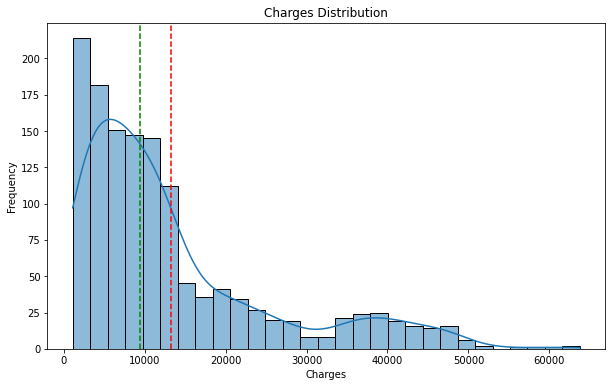

Skewness: 1.5153909108403483
Mean: 13279.121486655948
Median: 9386.1613


In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(x='charges', data=insurance, kde=True)
plt.axvline(insurance.charges.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(insurance.charges.median(), color='g', linestyle='--', label='Median')
plt.title('Charges Distribution')
plt.xlabel('Charges')
plt.ylabel('Frequency')
plt.show()
print(f'Skewness: {insurance["charges"].skew()}')
print(f'Mean: {(insurance["charges"].mean())}')
print(f'Median: {insurance["charges"].median()}')

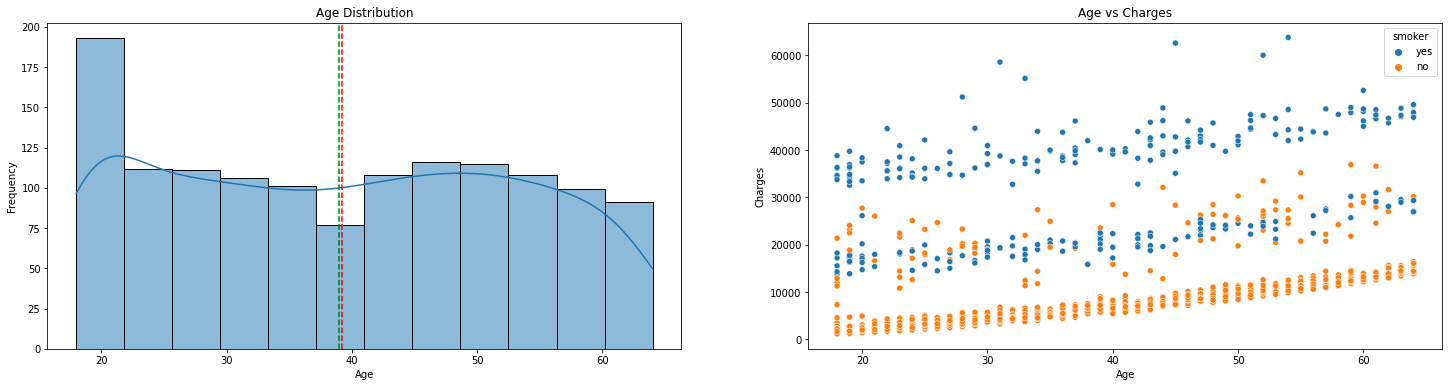

Skewness: 0.054780773126998195
Mean: 39
Median: 39.0
Minimum Age: 18
Maximum Age: 64


In [13]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='age', data=insurance, kde=True)
plt.axvline(insurance.age.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(insurance.age.median(), color='g', linestyle='--', label='Median')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.scatterplot(x='age', y='charges', data=insurance, hue='smoker')
plt.title('Age vs Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()
print(f'Skewness: {insurance["age"].skew()}')
print(f'Mean: {(insurance["age"].mean()):.0f}')
print(f'Median: {insurance["age"].median()}')
print(f'Minimum Age: {insurance["age"].min()}')
print(f'Maximum Age: {insurance["age"].max()}')

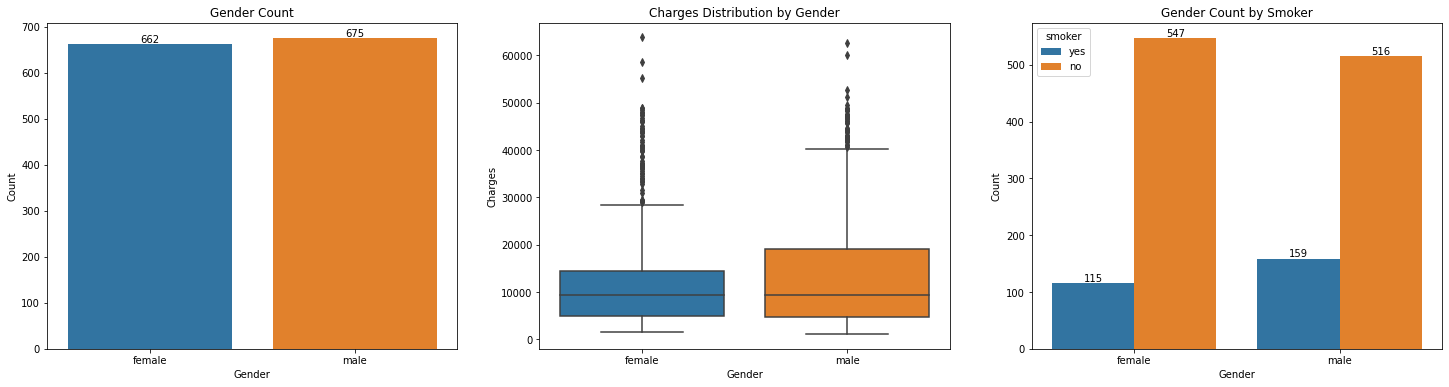

,sex,charges
0,female,12570.0
1,male,13975.0


In [14]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
fig = sns.countplot(x='sex', data=insurance)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 3, '{:1.0f}'.format(height), ha="center")
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
sns.boxplot(x='sex', y='charges', data=insurance)
plt.title('Charges Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Charges')
plt.subplot(1, 3, 3)
fig = sns.countplot(x='sex', data=insurance, hue='smoker')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 3, '{:1.0f}'.format(height), ha="center")
plt.title('Gender Count by Smoker')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

round(insurance.groupby('sex').charges.mean(), 0).reset_index()

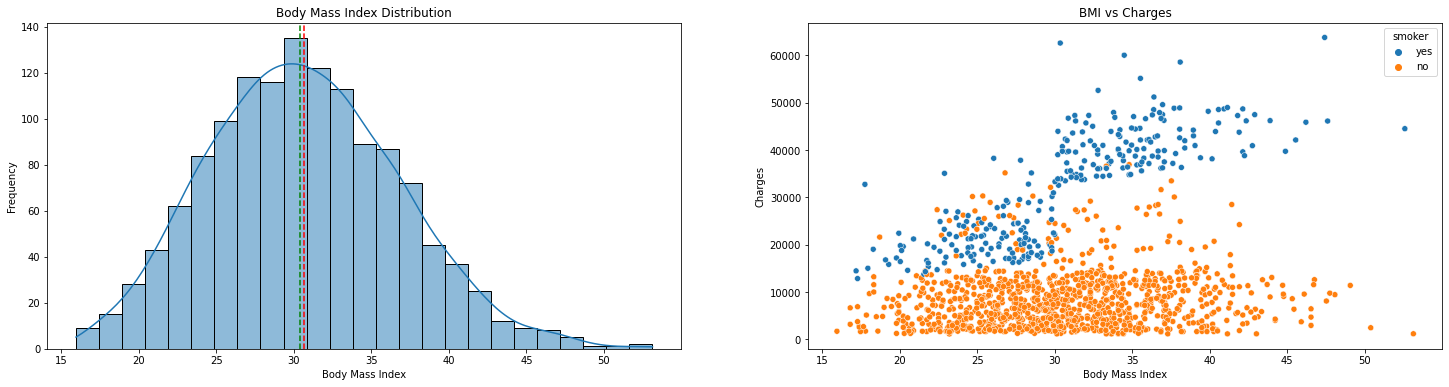

Skewness: 0.28391419385321137
Mean: 30.66345175766642
Median: 30.4


In [15]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
sns.histplot(x='bmi', data=insurance, kde=True)
plt.axvline(insurance.bmi.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(insurance.bmi.median(), color='g', linestyle='--', label='Median')
plt.title('Body Mass Index Distribution')
plt.xlabel('Body Mass Index')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
sns.scatterplot(x='bmi', y='charges', data=insurance, hue='smoker')
plt.title('BMI vs Charges')
plt.xlabel('Body Mass Index')
plt.ylabel('Charges')
plt.show()
print(f'Skewness: {insurance["bmi"].skew()}')
print(f'Mean: {(insurance["bmi"].mean())}')
print(f'Median: {insurance["bmi"].median()}')

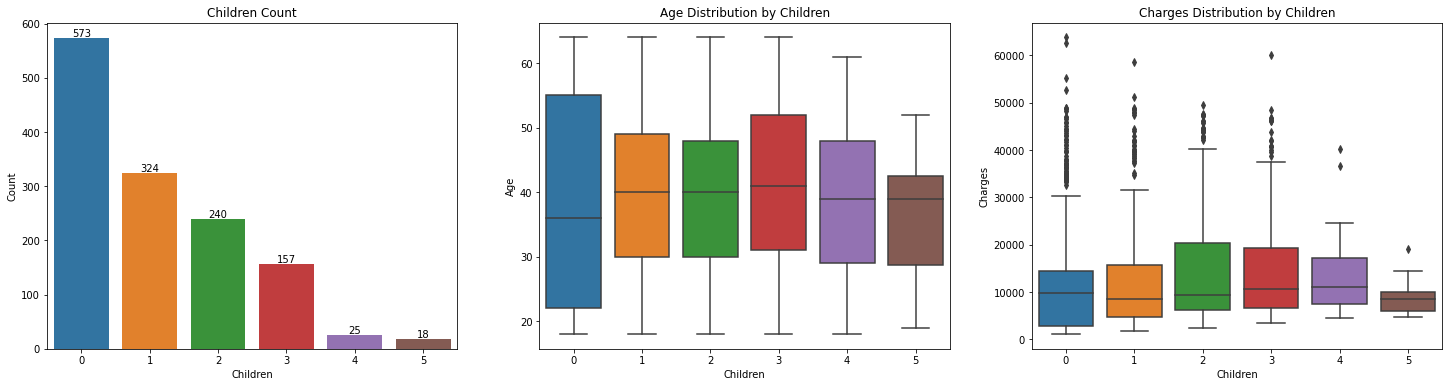

Mean: 1


In [16]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
fig = sns.countplot(x='children', data=insurance)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 3, '{:1.0f}'.format(height), ha="center")
plt.title('Children Count')
plt.xlabel('Children')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
sns.boxplot(x='children', y='age', data=insurance)
plt.title('Age Distribution by Children')
plt.xlabel('Children')
plt.ylabel('Age')
plt.subplot(1, 3, 3)
sns.boxplot(x='children', y='charges', data=insurance)
plt.title('Charges Distribution by Children')
plt.xlabel('Children')
plt.ylabel('Charges')
plt.show()
print(f'Mean: {(insurance["children"].mean()):.0f}')

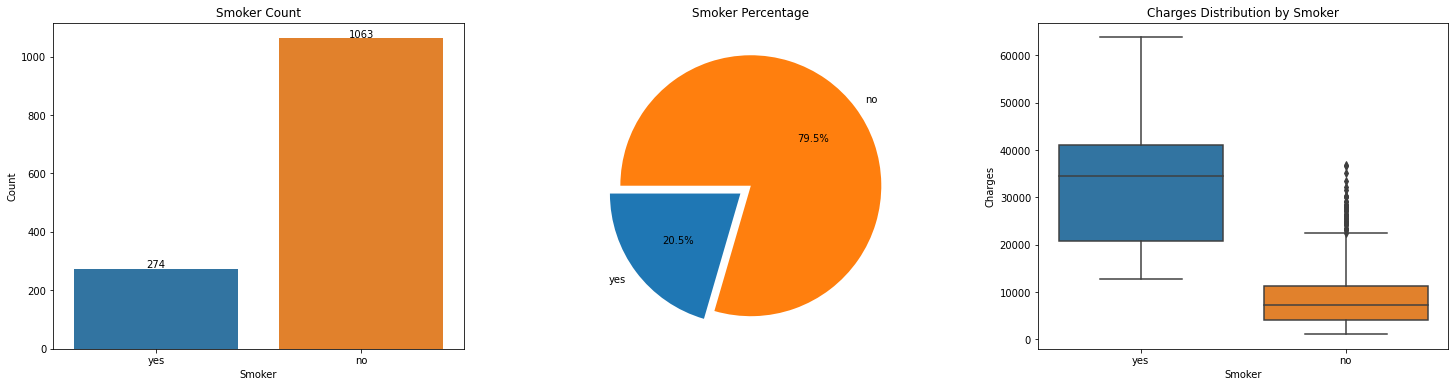

Average Charges for Smokers: $32050
Average Charges for Non-Smokers: $8441


In [17]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
fig = sns.countplot(x='smoker', data=insurance)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 3, '{:1.0f}'.format(height), ha="center")
plt.title('Smoker Count')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.subplot(1, 3, 2)
plt.pie(insurance.smoker.value_counts().reindex(['yes', 'no']), labels=insurance.smoker.value_counts().reindex(['yes', 'no']).index, autopct='%1.1f%%', explode=[0.1, 0], startangle=180)
plt.title('Smoker Percentage')
plt.subplot(1, 3, 3)
sns.boxplot(x='smoker', y='charges', data=insurance)
plt.title('Charges Distribution by Smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()
print(f"Average Charges for Smokers: ${(insurance[insurance.smoker == 'yes'].charges.mean()):.0f}")
print(f"Average Charges for Non-Smokers: ${(insurance[insurance.smoker == 'no'].charges.mean()):.0f}")

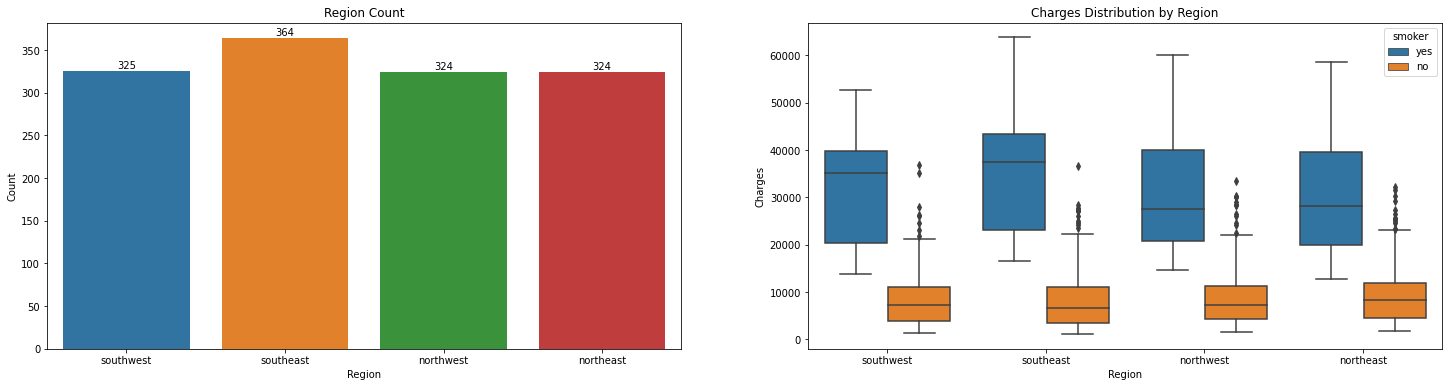

In [18]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 2, 1)
fig = sns.countplot(x='region', data=insurance)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 3, '{:1.0f}'.format(height), ha="center")
plt.title('Region Count')
plt.xlabel('Region')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.boxplot(x='region', y='charges', data=insurance, hue='smoker')
plt.title('Charges Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Charges')
plt.show()

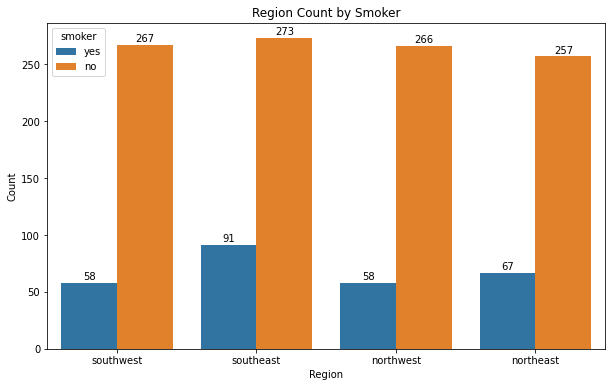

In [19]:
plt.figure(figsize=(10, 6))
fig = sns.countplot(x='region', data=insurance, hue='smoker')
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 3, '{:1.0f}'.format(height), ha="center")
plt.title('Region Count by Smoker')
plt.xlabel('Region')
plt.ylabel('Count')
plt.show()

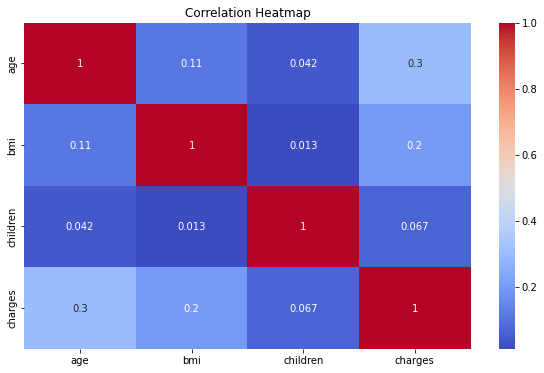

In [20]:
corr_num = insurance.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_num, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [21]:
insurance = insurance.drop(columns=['children'])

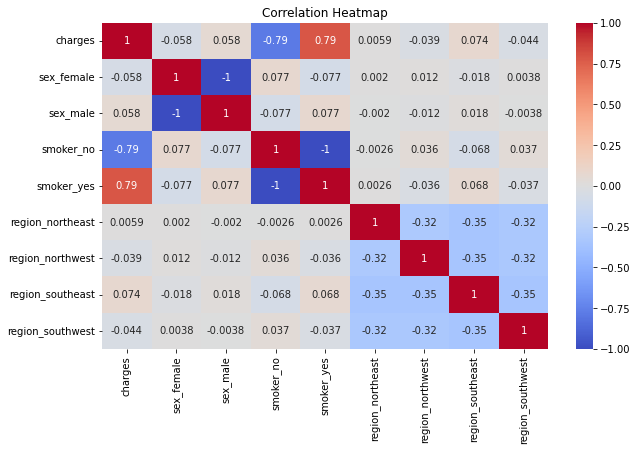

In [22]:
corr_cat = pd.get_dummies(insurance[['charges', 'sex', 'smoker', 'region']]).corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_cat, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [23]:
insurance = insurance.drop(columns=['sex', 'region'])
insurance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      1337 non-null   int64  
 1   bmi      1337 non-null   float64
 2   smoker   1337 non-null   object 
 3   charges  1337 non-null   float64
dtypes: float64(2), int64(1), object(1)
memory usage: 84.5+ KB


In [24]:
df_train_val, df_test = train_test_split(insurance, test_size=0.05, random_state=23)
df_train, df_val = train_test_split(df_train_val, test_size=0.1, random_state=23)
print(f'df_train proportion: {len(df_train) / len(insurance):.2f}')
print(f'df_val proportion: {len(df_val) / len(insurance):.2f}')
print(f'df_test proportion: {len(df_test) / len(insurance):.2f}')

df_train proportion: 0.85
df_val proportion: 0.09
df_test proportion: 0.05


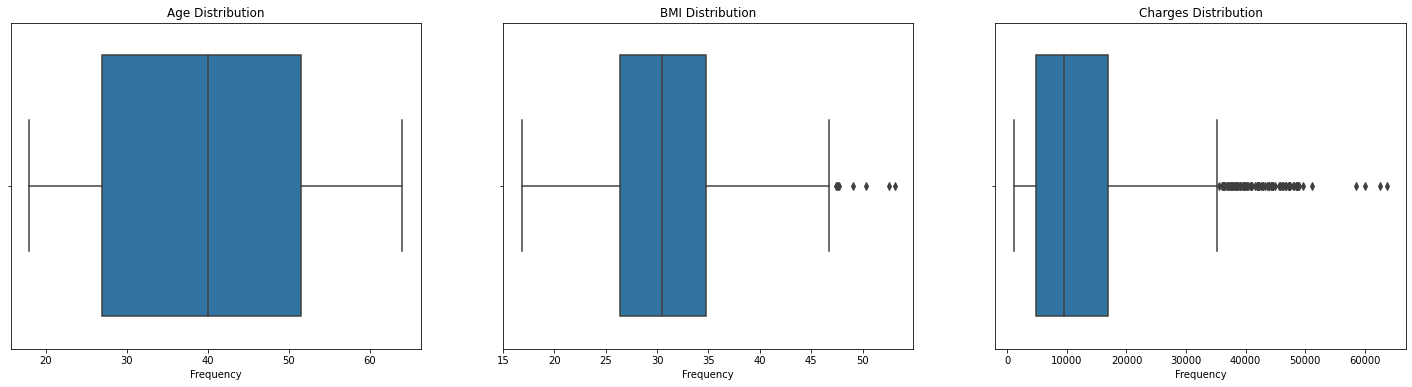

In [25]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
sns.boxplot(x='age', data=df_train)
plt.title('Age Distribution')
plt.xlabel('Frequency')
plt.subplot(1, 3, 2)
sns.boxplot(x='bmi', data=df_train)
plt.title('BMI Distribution')
plt.xlabel('Frequency')
plt.subplot(1, 3, 3)
sns.boxplot(x='charges', data=df_train)
plt.title('Charges Distribution')
plt.xlabel('Frequency')
plt.show()

In [26]:
def skewed_dis(df, col):
    IQR = df[col].quantile(0.75) - df[col].quantile(0.25)
    lower_bound = df[col].quantile(0.25) - (IQR * 1.5)
    upper_bound = df[col].quantile(0.75) + (IQR * 1.5)
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)] 
outliers = skewed_dis(df_train, 'charges')
print(f"Outlier percentage: {(len(outliers) / len(df_train) * 100):.1f}%")
outliers

Outlier percentage: 9.7%


,age,bmi,smoker,charges
668,62,32.015,yes,45710.20785
298,31,34.390,yes,38746.35510
629,44,38.950,yes,42983.45850
826,56,31.790,yes,43813.86610
14,27,42.130,yes,39611.75770
...,...,...,...,...
697,41,35.750,yes,40273.64550
34,28,36.400,yes,51194.55914
883,51,37.050,yes,46255.11250
338,50,32.300,yes,41919.09700


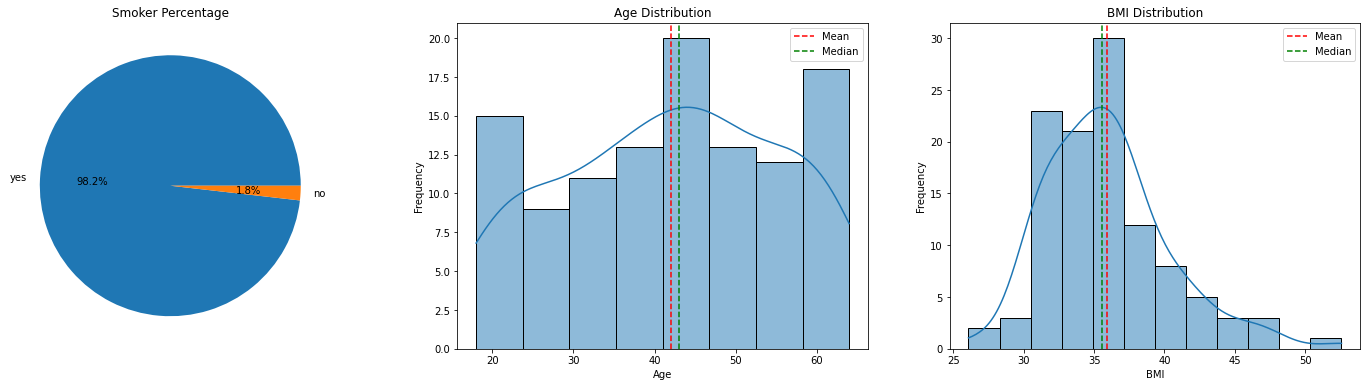

Average Charges From Outliers: $42615
Average Age From Outliers: 42
Average BMI From Outliers: 36


In [27]:
plt.figure(figsize=(25, 6))
plt.subplot(1, 3, 1)
plt.pie(outliers.smoker.value_counts().reindex(['yes', 'no']), labels=outliers.smoker.value_counts().reindex(['yes', 'no']).index, autopct='%1.1f%%')
plt.title('Smoker Percentage')
plt.subplot(1, 3, 2)
sns.histplot(x='age', data=outliers, kde=True)
plt.axvline(outliers.age.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(outliers.age.median(), color='g', linestyle='--', label='Median')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.subplot(1, 3, 3)
sns.histplot(x='bmi', data=outliers, kde=True)
plt.axvline(outliers.bmi.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(outliers.bmi.median(), color='g', linestyle='--', label='Median')
plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.legend()
plt.show()

print(f'Average Charges From Outliers: ${(outliers.charges.mean()):.0f}')
print(f'Average Age From Outliers: {outliers.age.mean():.0f}')
print(f'Average BMI From Outliers: {outliers.bmi.mean():.0f}')

In [28]:
X_train = df_train.drop(columns=['charges'])
y_train = df_train.charges
X_val = df_val.drop(columns=['charges'])
y_val = df_val.charges

In [29]:
num_pipe = Pipeline([('scaling', StandardScaler())])
cat_pipe = Pipeline([('encode', OneHotEncoder(handle_unknown='ignore'))])
preprocess = ColumnTransformer([
    ('num',num_pipe, X_train.select_dtypes(include=['float64', 'int64']).columns),
    ('cat',cat_pipe, X_train.select_dtypes(include=['object']).columns)
])

In [30]:
poly_lr_pipe = Pipeline([('preprocessing', preprocess), ('pca', PCA(n_components=0.95)), ('poly', PolynomialFeatures()), ('model', LinearRegression())])

In [31]:
poly = GridSearchCV(poly_lr_pipe, param_grid=poly_params, cv=5, n_jobs=-1)

NameError: name 'poly_params' is not defined